1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
2. Now we will try to check the normality of the numerical variables visually
    2.1 Use seaborn library to construct distribution plots for the numerical variables
    2.2 Use Matplotlib to construct histograms
    2.3 Do the distributions for different numerical variables look like a normal distribution? 
3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

### Pre-Processing
5. X-y split
6. Normalize (numerical)
7. One Hot/Label Encoding (categorical)
8. Concat DataFrames

### Linear Regression
9. Train-test split
10. Apply linear regression

### Model Validation
11. Description: R2, MSE, RMSW, MAE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('final_cleaned_marketing_customer_analysis.csv')

In [3]:
df = df.drop(['Unnamed: 0'], axis=1) 
df.sample(5)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,total_claim_amount_range,income_group
310,MD95935,California,5845.426201,No,Basic,Bachelor,1/11/11,Employed,F,43145,...,Corporate L3,Offer3,Web,516.421124,Two-Door Car,Medsize,A,January,500-750,Middle
2989,VZ18907,Oregon,21991.615980,No,Basic,College,1/12/11,Employed,F,80807,...,Personal L3,Offer2,Branch,132.139111,SUV,Large,A,January,0-250,Very High
2441,NE49052,California,6618.016423,No,Extended,High School or Below,2/7/11,Medical Leave,F,20068,...,Corporate L2,Offer1,Web,411.011162,Four-Door Car,Medsize,A,February,250-500,Low
2187,GP83239,California,7840.165778,Yes,Extended,College,1/14/11,Employed,M,58414,...,Personal L3,Offer2,Agent,1008.000000,Luxury SUV,Small,A,January,>1000,High
4203,BA38428,Arizona,5639.941974,Yes,Basic,High School or Below,1/10/11,Employed,M,73168,...,Corporate L3,Offer2,Agent,425.800112,Four-Door Car,Medsize,A,January,250-500,High


1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.

In [4]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [5]:
numericals = df.select_dtypes(include=[np.number])
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [6]:
categoricals = df.select_dtypes(include=[np.object])
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type',
       'month', 'total_claim_amount_range', 'income_group'],
      dtype='object')

2. Now we will try to check the normality of the numerical variables visually

In [7]:
summary = df.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,4815.0,8023.0,6926.0,1904.0,4038.0,5838.0,8937.0,83325.0,4898.0
income,4815.0,37635.0,30190.0,0.0,0.0,34516.0,61576.0,99961.0,61576.0
monthly_premium_auto,4815.0,94.0,35.0,61.0,69.0,83.0,110.0,298.0,41.0
months_since_last_claim,4815.0,15.0,10.0,0.0,6.0,14.0,23.0,35.0,17.0
months_since_policy_inception,4815.0,48.0,28.0,0.0,24.0,48.0,72.0,99.0,48.0
number_of_open_complaints,4815.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number_of_policies,4815.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total_claim_amount,4815.0,434.0,294.0,0.0,259.0,381.0,548.0,2893.0,289.0


2.1 Use seaborn library to construct distribution plots for the numerical variables

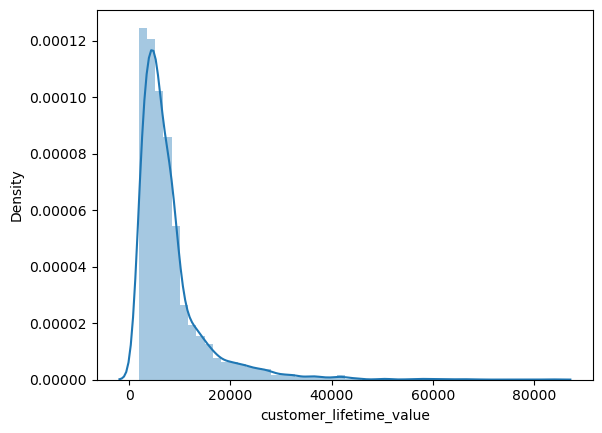

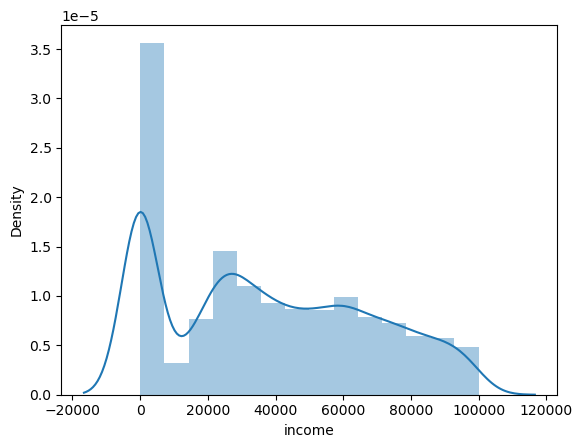

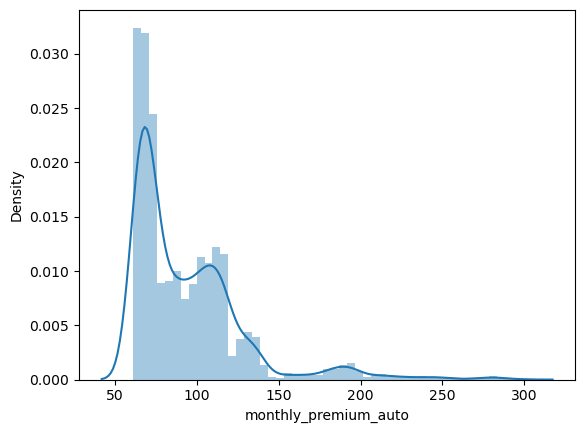

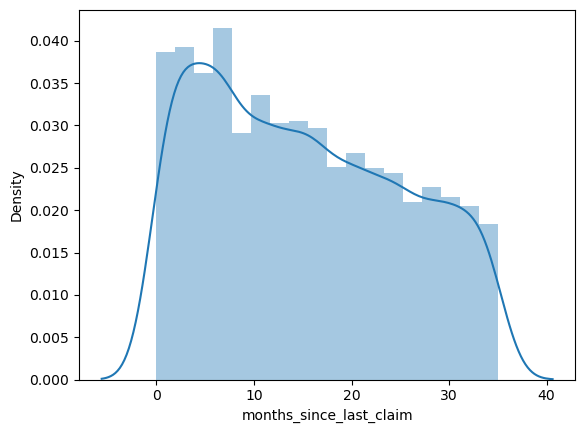

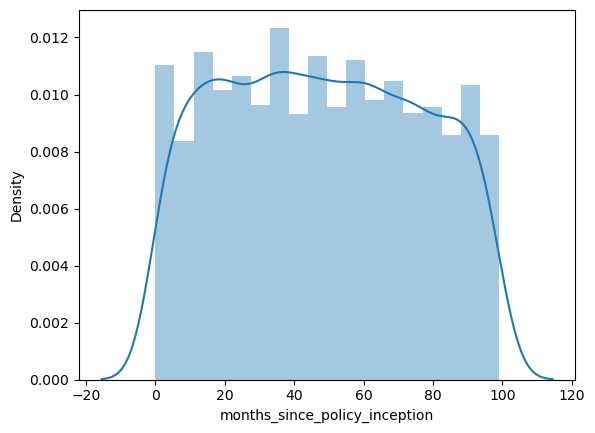

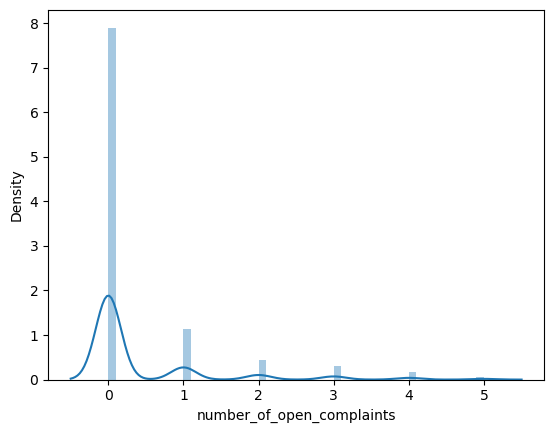

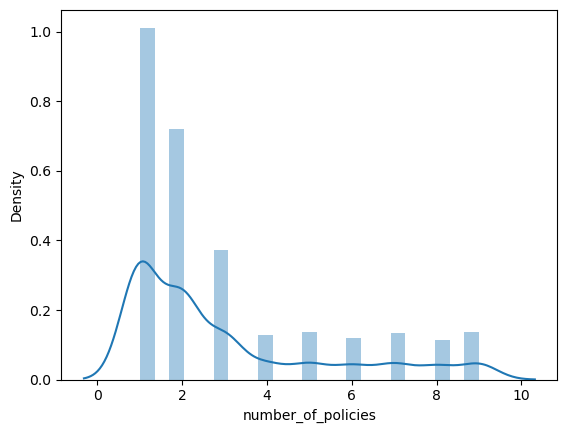

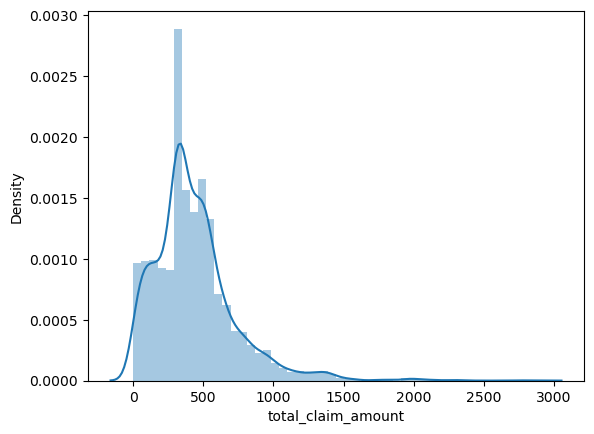

In [8]:
for column in numericals.columns:
    sns.distplot(numericals[column])
    plt.show()

2.2 Use Matplotlib to construct histograms

In [9]:
len(numericals.columns)

8

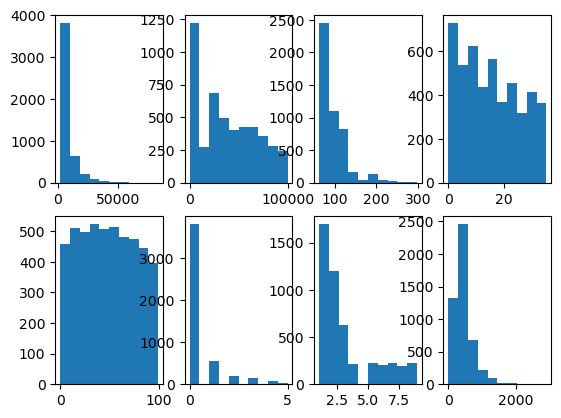

In [10]:
fig, axs = plt.subplots(2, 4)
axs[0, 0].hist(numericals['customer_lifetime_value'])
axs[0, 1].hist(numericals['income'])
axs[0, 2].hist(numericals['monthly_premium_auto'])
axs[0, 3].hist(numericals['months_since_last_claim'])
axs[1, 0].hist(numericals['months_since_policy_inception'])
axs[1, 1].hist(numericals['number_of_open_complaints'])
axs[1, 2].hist(numericals['number_of_policies'])
axs[1, 3].hist(numericals['total_claim_amount'])
plt.show()

2.3 Do the distributions for different numerical variables look like a normal distribution?

The distribution of the 'customer_lifetime_value', 'income', 'monthly_premium_auto', and 'total_claim_amount' variables appear to be somewhat bell-shaped and symmetric, which could indicate a normal distribution.

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [11]:
correlations_numericals = numericals.corr()
correlations_numericals = round(correlations_numericals,2)
correlations_numericals

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.41,0.03,0.03,-0.04,0.02,0.23
income,0.02,1.00,-0.00,-0.01,-0.01,0.00,-0.01,-0.35
monthly_premium_auto,0.41,-0.00,1.00,-0.00,0.03,-0.00,-0.03,0.63
months_since_last_claim,0.03,-0.01,-0.00,1.00,-0.04,-0.00,0.00,-0.01
months_since_policy_inception,0.03,-0.01,0.03,-0.04,1.00,0.00,-0.01,0.01
number_of_open_complaints,-0.04,0.00,-0.00,-0.00,0.00,1.00,0.01,-0.01
number_of_policies,0.02,-0.01,-0.03,0.00,-0.01,0.01,1.00,0.00
total_claim_amount,0.23,-0.35,0.63,-0.01,0.01,-0.01,0.00,1.00


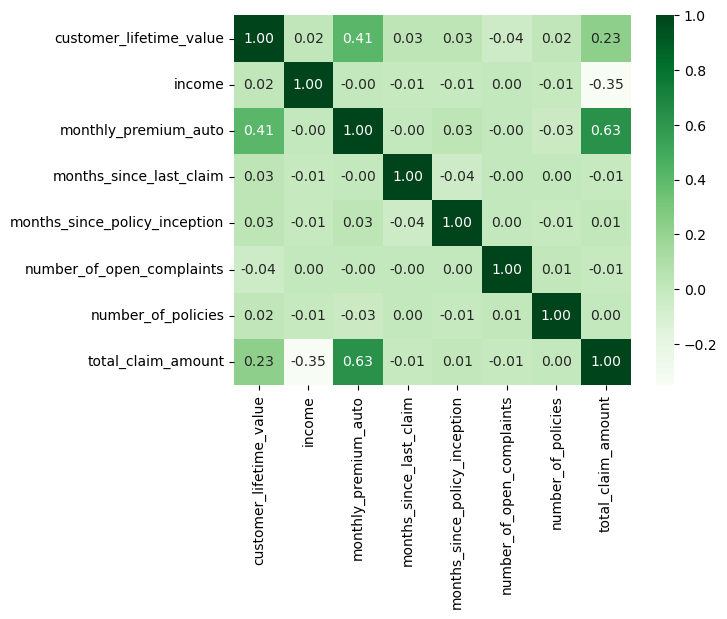

In [12]:
sns.heatmap(correlations_numericals, cmap="Greens", annot=True, fmt='.2f')
plt.show()

4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There's no high correlation between two variables.

5. X-y split

In [13]:
y = numericals['total_claim_amount']
X = numericals.drop(['total_claim_amount'], axis=1)
X.sample(20)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3936,8578.364528,78077,107,11.0,47,2.0,6
3732,4529.072491,94757,112,0.0,25,0.0,1
4317,7838.068321,0,69,9.0,12,0.0,2
439,8436.350708,49182,70,6.0,86,0.0,2
1395,7780.489322,87128,97,26.0,45,0.0,3
833,15363.847160,15897,101,30.0,99,0.0,2
3686,16473.169050,22828,106,11.0,54,0.0,2
4282,5163.838813,88692,64,29.0,26,0.0,5
3793,8532.989751,30092,108,33.0,90,0.0,9
4675,7595.335237,20538,104,25.0,64,0.0,7


6. Normalize (numerical)

In [14]:
scaler = MinMaxScaler()
scaler.fit(numericals)
normalized_nums = scaler.transform(numericals)
nums_norm = pd.DataFrame(normalized_nums, columns=numericals.columns)

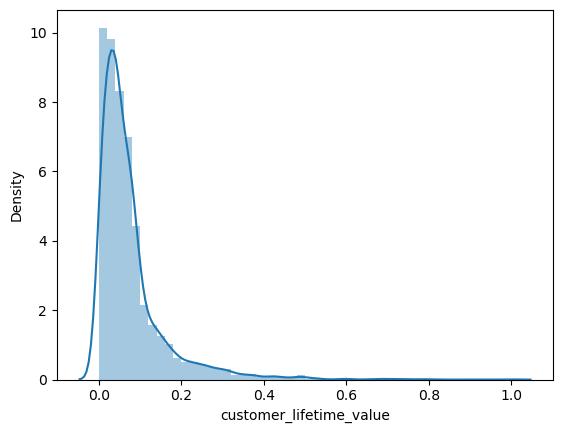

In [15]:
sns.distplot(nums_norm['customer_lifetime_value']) # for example for customer_lifetime_value
plt.show()

7. One Hot/Label Encoding (categorical)

In [16]:
X_num = df.select_dtypes(include = np.number)
X_cat = df.select_dtypes(include = np.object)
X_cat.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type',
       'month', 'total_claim_amount_range', 'income_group'],
      dtype='object')

Checking all columns for their categories, and dropping the column if there are too many or only one category. Also dropping the columns that I had added for visualization.

In [17]:
X_cat.education.unique()

array(['Bachelor', 'College', 'High School or Below', 'Master', 'Doctor'],
      dtype=object)

In [18]:
X_cat = X_cat.drop(['customer'], axis=1)

In [19]:
X_cat = X_cat.drop(['effective_to_date'], axis=1)

In [20]:
X_cat = X_cat.drop(['vehicle_type'], axis=1)

In [21]:
X_cat = X_cat.drop(['total_claim_amount_range'], axis=1)

In [22]:
X_cat = X_cat.drop(['income_group'], axis=1)

In [23]:
X_cat = X_cat.drop(['month'], axis=1)

In [24]:
X_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [25]:
# for more than one categorical column we use the get dummies method to one hot encode
X_cat_dumm = pd.get_dummies(X_cat, drop_first=True)
X_cat_dumm

,state_California,state_Nevada,state_Oregon,state_Washington,state_no data,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4810,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4811,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4812,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4813,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


8. Concat DataFrames

In [26]:
X_concatenated = pd.concat([X_cat_dumm, X_num], axis=1)
X_concatenated.sample(5)

,state_California,state_Nevada,state_Oregon,state_Washington,state_no data,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,...,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1599,0,0,0,1,0,0,1,0,0,0,...,1,0,10515.967790,21499,135,34.0,28,1.0,3,648.000000
1078,0,1,0,0,0,1,1,0,0,0,...,0,1,5678.050167,0,76,8.0,44,0.0,3,364.800000
149,1,0,0,0,0,0,0,0,0,0,...,1,0,2738.001957,0,74,27.0,91,0.0,1,263.365432
1788,0,0,0,0,1,0,1,0,0,0,...,0,0,10978.783400,92914,136,24.0,55,0.0,8,979.200000
2125,1,0,0,0,0,1,0,0,1,0,...,1,0,17497.522010,0,73,9.0,94,0.0,2,350.400000


## Linear Regression

9. Train-test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=78)

In [39]:
len(X)*0.3

1444.5

In [40]:
len(X_train)

3370

In [41]:
len(X_test)

1445

10. Apply linear regression

In [42]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [43]:
predictions  = model.predict(X_test)
predictions #[2]

array([345.17095776, 339.90040674, 322.63952788, ..., 335.50441835,
       341.89759491, 191.51891848])

In [44]:
y_test #[2]

4010     85.683520
4740    118.454974
3389    504.000000
3160    619.200000
3445    987.122788
           ...    
4793    321.600000
4783    425.817950
3917    393.600000
4779    292.800000
86      309.577946
Name: total_claim_amount, Length: 1445, dtype: float64

In [45]:
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,total_claim_amount_range,income_group
0,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,250-500,Low
1,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,250-500,Middle
2,HO81102,no data,4745.181764,No,Basic,High School or Below,2/14/11,Employed,M,50549,...,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,February,250-500,High
3,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,January,250-500,Very High
4,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,January,250-500,High


## Model Validation

Description: R2, RMSE, MSE, MAE

In [35]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE = ", MAE)

r2 =  0.493751556677929
RMSE =  210.65267542424797
MSE =  44374.54966339356
MAE =  149.23203439812022


- An r2 value of 0.4937 indicates that the model explains approximately 49.37% of the variance in the target variable. This means that there may be other factors beyond the model that are influencing the target variable.
- An RMSE value of 210.65 means that, on average, the model's predictions are off by approximately 210.65 for each data point. I feel that is quite a lot, if the mean claim amount is 433.97.
- An MAE value of 149.23 means that, on average, the model's predictions are off by approximately 149.23 for each data point. MAE can be a useful alternative to RMSE in cases where the data contains outliers (which is the case here when it comes to the total claim amount).

In [36]:
df['total_claim_amount'].describe()

count    4815.000000
mean      433.968686
std       294.084064
min         0.099007
25%       259.476251
50%       381.118731
75%       547.988754
max      2893.239678
Name: total_claim_amount, dtype: float64

In [37]:
149/2893

0.05150362945039751